In [1]:
import numpy as np
import os
import pandas as pd
import torch
import albumentations as A
import albumentations.pytorch
import cv2
import sys
import random
import csv
import json
import matplotlib.pyplot as plt

sys.path.append('../')
from visualize import visualize
from utils import *

%matplotlib inline

In [2]:
df = pd.read_csv('../saved/df.csv')
df.shape

(24782, 14)

In [3]:
df.label = df.label.apply(lambda x : CLASS_MAPPER[str(x)])
df = drop_wrong(df)
df.reset_index(drop=True, inplace=True)
print(df.shape)

(22663, 14)


In [4]:
train_inds, test_inds = paps_data_split(df)

In [5]:
print(len(train_inds))
print(len(test_inds))

15187
7457


In [6]:
len(set(train_inds))

15187

In [8]:
len(set(test_inds))

7457

In [7]:
max(test_inds)

22662

In [9]:
df.label.value_counts()

ASC-US       11057
LSIL          5249
Negative      3647
HSIL          1466
ASC-H         1225
Carcinoma       19
Name: label, dtype: int64

In [35]:
1 + np.random.rand(1) * 0.5

array([1.3857305])

In [ ]:
train_df = df

In [11]:
df = pd.read_csv('../saved/df.csv')
df.label = df.label.apply(lambda x : CLASS_MAPPER[str(x)])
df = drop_wrong(df)
df.reset_index(drop=True, inplace=True)
print(df.shape)

(22663, 14)


In [13]:
df = df.sort_values('area', axis=0)

../../lbp_data/patch_images/2021.01.12/LBC253-20210107(1)/LBC253-20210107(1)_1085.png [662 649  75  70] ['ASC-H'] [72]
../../lbp_data/patch_images/2021.01.12/LBC253-20210107(1)/LBC253-20210107(1)_537.png [1890  681   65   81] ['ASC-H'] [72]
../../lbp_data/patch_images/2021.05.24/LBC1021-20210120(1)/LBC1021-20210120(1)_2032.png [ 112 1176   79   67] ['ASC-H'] [72]
../../lbp_data/patch_images/2021.05.18/LBC779-20210116(1)/LBC779-20210116(1)_1479.png [1203 1200   84   62] ['Negative'] [72]
../../lbp_data/patch_images/2021.05.18/LBC812-20210116(1)/LBC812-20210116(1)_867.png [810 446  76  69] ['ASC-H'] [72]
../../lbp_data/patch_images/2021.01.11/LBC201-20210106(1)/LBC201-20210106(1)_761.png [1789  522   60   87] ['ASC-H'] [72]
../../lbp_data/patch_images/2021.05.24/LBC1021-20210120(1)/LBC1021-20210120(1)_1350.png [1637 1359   84   63] ['ASC-H'] [72]
../../lbp_data/patch_images/2021.05.11/LBC606-20210113(1)/LBC606-20210113(1)_804.png [1729 1419   93   57] ['HSIL'] [72]
../../lbp_data/patch_i

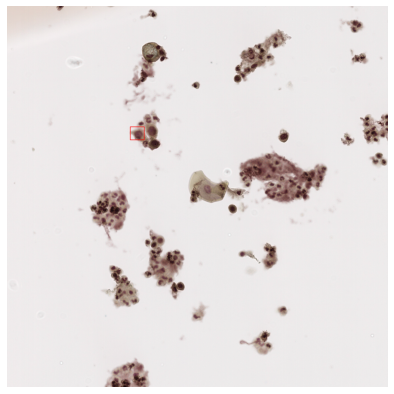

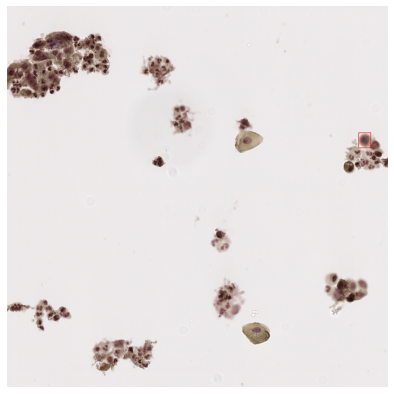

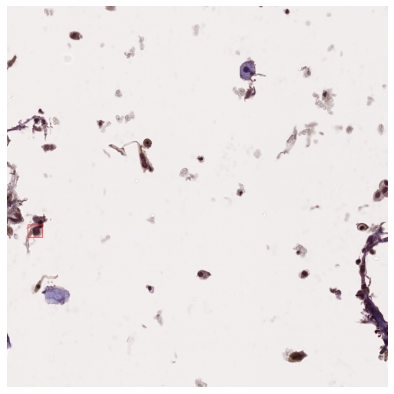

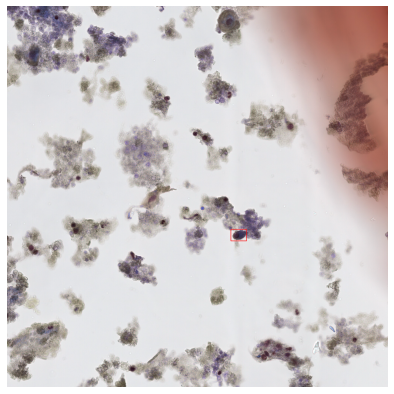

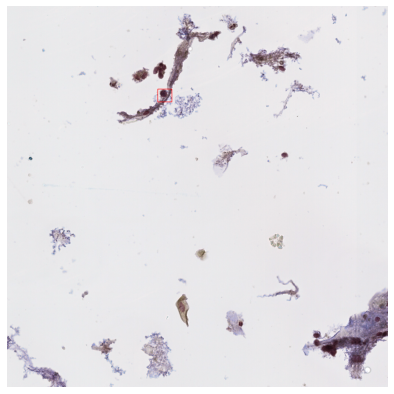

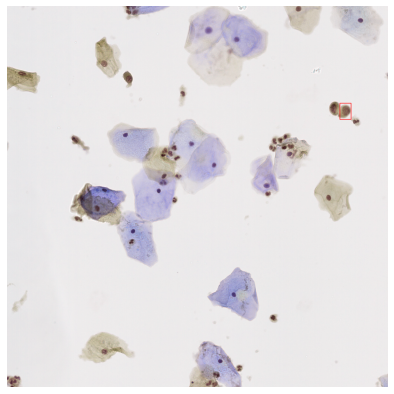

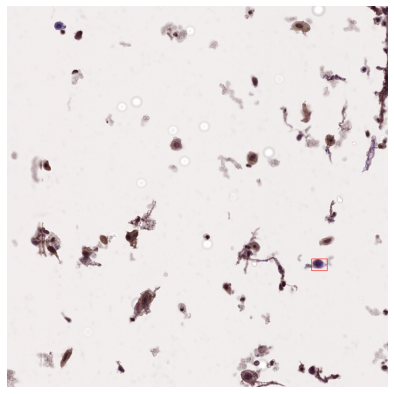

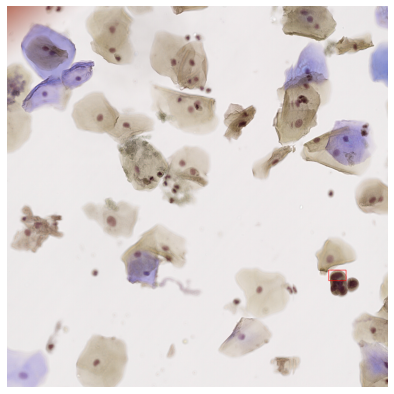

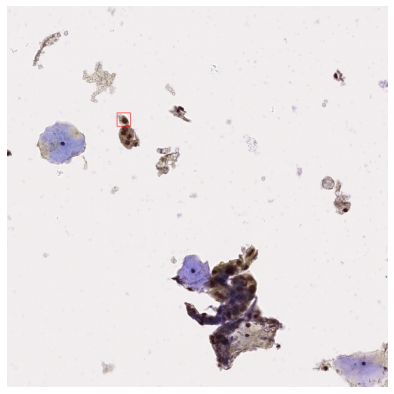

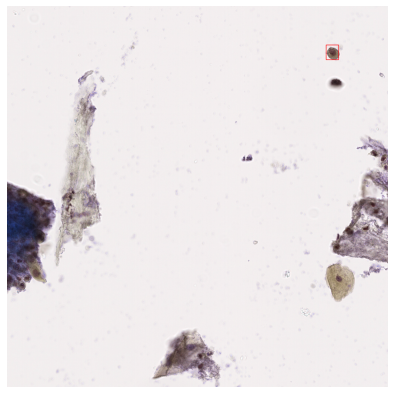

In [31]:
rel_path = '../../lbp_data/'

for NUM in range(500,510) :
    path = rel_path + df[['file_name']].values[NUM][0]
    boxes = df[['xmin', 'ymin', 'w', 'h']].values[NUM]
    label = df[['label']].values[NUM]
    area = df[['area']].values[NUM]
    print(path, boxes, label, area)
    img = cv2.imread(path)
    visualize(img, [boxes])  